In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from knn_weights import *
from matplotlib.colors import ListedColormap

from space_metric import *
from knn_plot import *
from knn_tests import *

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
iris = datasets.load_iris()

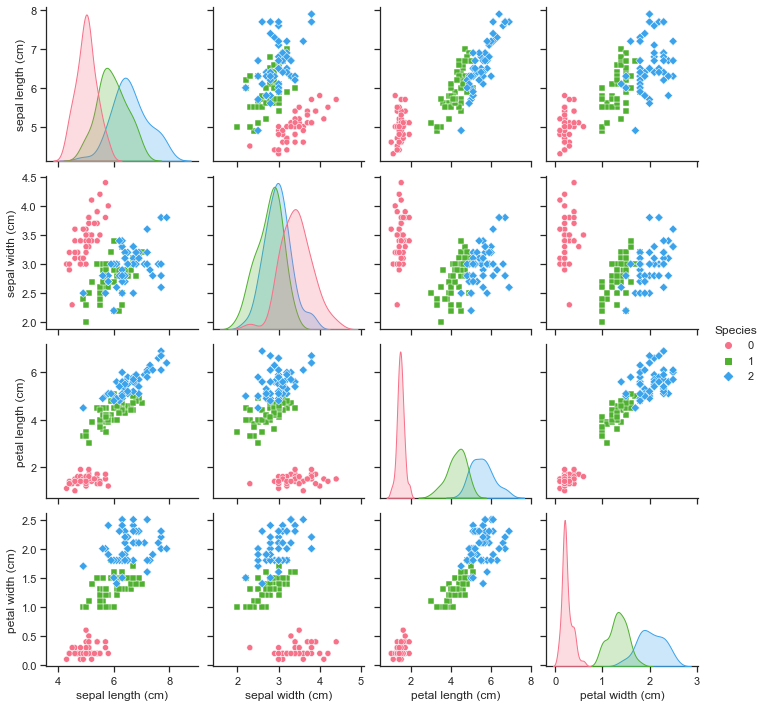

In [3]:
plt.rcParams['figure.figsize'] = [15, 15]

dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
dataframe['Species'] = iris['target']
#print(dataframe)

sns.set(style="ticks", color_codes=True)
sns.pairplot(dataframe, hue= 'Species', palette=sns.color_palette("husl", 3), markers=["o", "s", "D"])

Загружаем 2 фичи

In [4]:
X = iris.data[:, :2]
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

metric = get_dst_metric(2)
kernel = triangular_window
k = 10
max_distance = max([max([metric(y, x) for x in X_train]) for y in X_train]) * 0.1

Точность на тесте

In [6]:
print('accuracy: ', measure_accuracy(X_test, y_test, X_train, y_train, k, metric, kernel, max_distance))

accuracy:  0.8


Точность на самих себе

In [7]:
print('accuracy: ', measure_accuracy(X_train, y_train, X_train, y_train, k, metric, kernel, max_distance))

accuracy:  0.8761904761904762


Теперь попробуем выкинуть лишние точки 

In [8]:
weights = remove_redundant_points(X_train, y_train, k, metric, kernel, max_distance, 30)
non_zero_ids = [i for i in range(weights.shape[0]) if weights[i] > 0]

reduced_x = X_train[non_zero_ids]
reduced_y = y_train[non_zero_ids]
reduced_weights = weights[non_zero_ids]

In [9]:
print(reduced_weights)
print(reduced_y)

[ 1.  4.  1.  2.  1. 17.  1.  1.  2.  1.  1.  2. 13.  1. 30. 29.  1.  1.
  2. 20. 28.  1.  4.  1.  6. 19. 14. 30.  3. 14. 16. 19. 11. 27. 19. 30.
 28.  9.  2.  2.  1. 25. 15.  9. 30. 10. 30.  1.  2.  5.  1.]
[1 2 2 1 2 1 2 1 2 1 2 1 2 2 2 1 1 2 1 2 1 2 1 1 2 1 2 2 2 1 2 1 1 2 1 2 1
 1 2 1 2 1 2 2 1 2 2 1 2 1 2]


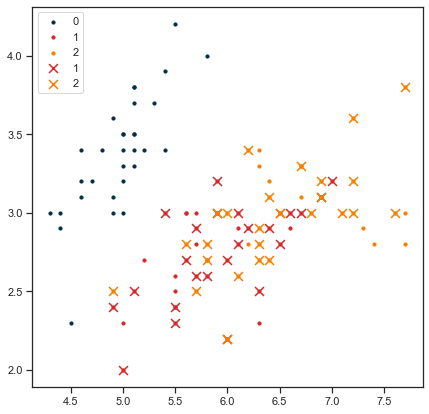

In [10]:
plt.rcParams['figure.figsize'] = [7, 7]

fig, ax = plt.subplots()

scatter_markers(ax, X_train[:, 0], X_train[:, 1], y_train, 10, 'o')
scatter_markers(ax, reduced_x[:, 0], reduced_x[:, 1], reduced_y, 80, 'x')

ax.legend()
plt.show()

Какова точность на Train по "выжившим" точкам?

In [11]:
print('accuracy after: ', measure_accuracy(X_train, y_train, reduced_x, reduced_y, k, metric, kernel, 
                                           max_distance, reduced_weights))

accuracy after:  0.9238095238095239


Точность на Test?

In [12]:
print('accuracy after: ', measure_accuracy(X_test, y_test, reduced_x, reduced_y, k, metric, kernel, 
                                           max_distance, reduced_weights))

accuracy after:  0.7333333333333333


Как выглядели данные на всё пространсве до отсечения "мусора"

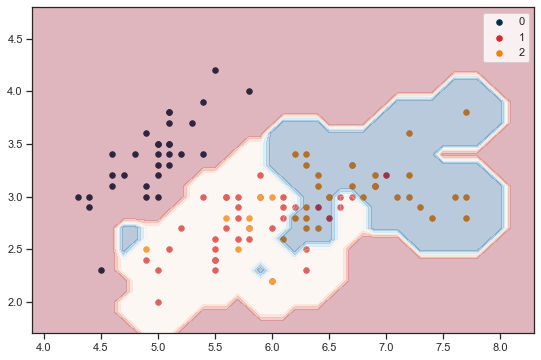

In [13]:
plt.rcParams['figure.figsize'] = [9, 6]

plot_map(X_test, y_test, X_train, y_train,  k, metric, kernel, max_distance)
plt.legend()
plt.show()

А после отсечения?

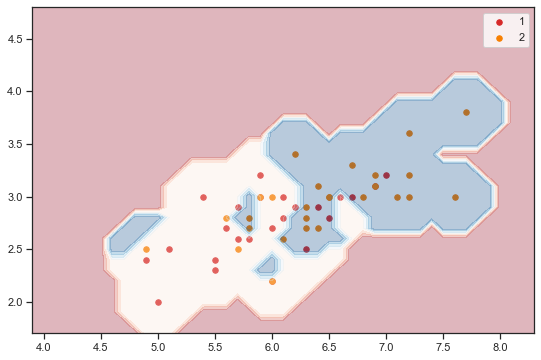

In [14]:
plot_map(X_test, y_test, reduced_x, reduced_y,  k, metric, kernel, max_distance)
plt.legend()
plt.show()

Прогоним классификатор на тесте и выведем правильные и ошибочные предсказания

In [15]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

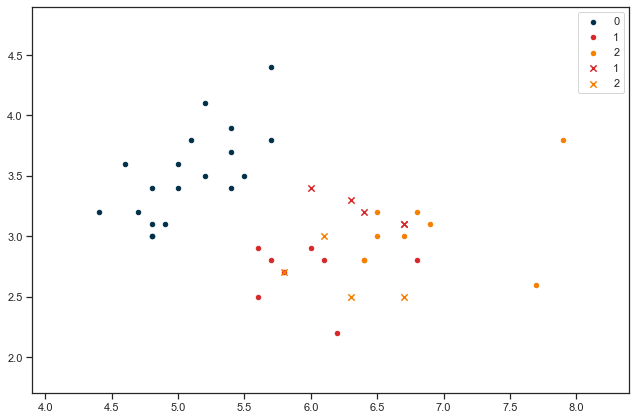

In [16]:
test_predictions = predict_array(X_test, X_train, y_train, k, metric, kernel, max_distance)
plot_correct_wrong(test_predictions, X_test, y_test, True)

In [17]:
measure_knn(iris, 2, 10, get_dst_metric(2), triangular_window, 0.3, max_distance)

accuracy on self:  0.8761904761904762
accuracy on test:  0.8
accuracy on itself after weights:  0.8857142857142857
accuracy on test after weights:  0.7111111111111111


In [19]:
measure_knn(iris, 4, 10, get_dst_metric(2), triangular_window, 0.3, max_distance)

accuracy on self:  1.0
accuracy on test:  0.7777777777777778
accuracy on itself after weights:  1.0
accuracy on test after weights:  0.7111111111111111


In [21]:
spread = [measure_knn_data(iris, 4, 10, get_dst_metric(2), triangular_window, 0.3, max_distance, True) for i in range(10)]

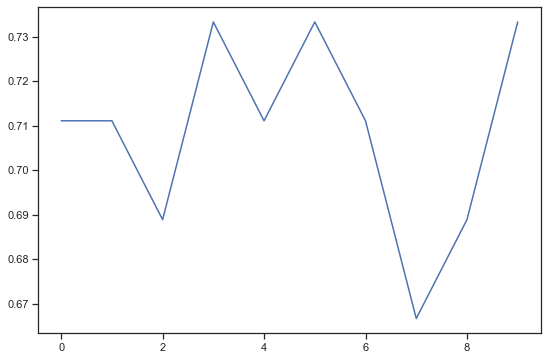

In [22]:
#print(np.array(spread)[:,:])
plt.plot(np.array(spread)[:, 3])
plt.show()